# 0.0 IMPORTS


In [1]:
import numpy as np
from sklearn    import datasets as ds
from matplotlib import pyplot   as plt
from sklearn    import cluster  as ct, metrics as mt

# 1.0 LOADING DATASET

In [2]:
x,y = ds.make_blobs(
    n_samples= 100,
    n_features= 2,
    centers=4 ,
    cluster_std= [0.4,0.9,0.5,0.6],
    random_state= 0)

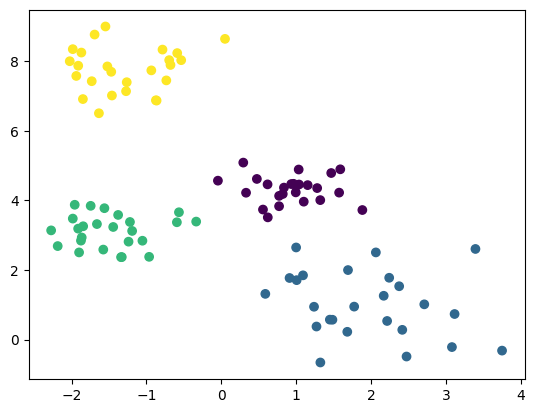

In [3]:
plt.scatter(x[:,0],x[:,1], c=y);

# 2.0 TRAINING MODEL

In [4]:
n_clusters = 4
#define
kmeans = ct.KMeans(
        n_clusters= n_clusters,
        init= 'random',
        n_init= 10,
        random_state=0)
#training
labels = kmeans.fit_predict(x)
#performance
ss = mt.silhouette_score(x, labels)
print(ss)

0.6560233416864877


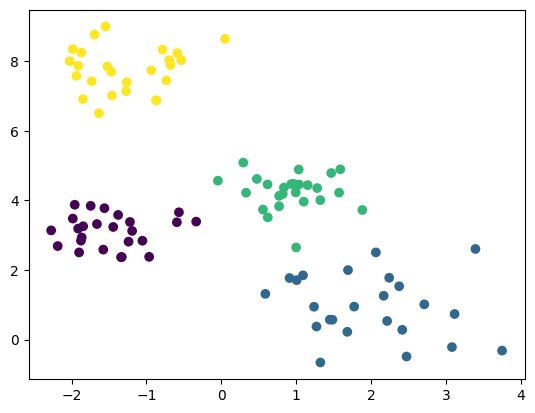

In [5]:
plt.scatter(x[:,0],x[:,1], c=labels)

# 3.0 FINE TUNING

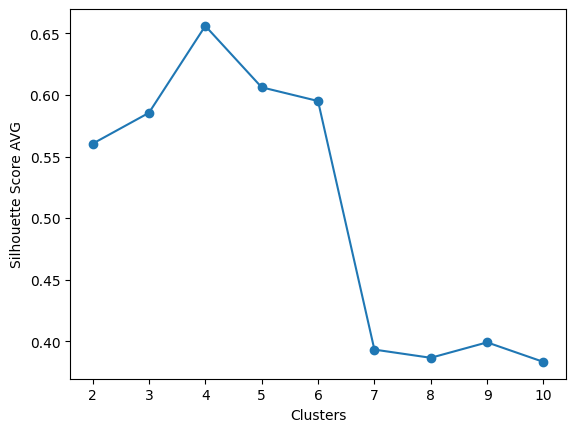

In [6]:
n_clusters = np.arange(2,11,1)
ss_list =[]
#define
for c in n_clusters:
    kmeans = ct.KMeans(
            n_clusters= c,
            init= 'random',
            n_init= 10,
             random_state=0)
    #training
    labels = kmeans.fit_predict(x)
    #performance
    ss_avg = mt.silhouette_score(x, labels)
    ss_list.append(ss_avg)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score AVG")
plt.plot(n_clusters,ss_list,'-o');